In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#From class we have
def cheb_mat_uniform(nx,order):
    x=np.linspace(-1.0,1.0,nx)
    mat=np.zeros([nx,order+1])
    #Recursion relation for Chebyshevs
    mat[:,0]=1.0
    if order>0:
        mat[:,1]=x
    if order>1:
        for i in range(1,order):
            mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    return mat,x


In [31]:
#Note, before fitting the Chebyshevs... 

#We need to figure out a way to map from whatever x domain we are interested in to
# x in -1, 1 (where Chebys are valid)

#Mapping...
def map_to_chevybounds(x):
    x_mapped = np.zeros(len(x))
    for i in range(len(x)):
        #Take each value, measure it's distance from min of orginal x and normalize to 2 so it fits in (-1,1).
        #Start at -1.0
        x_mapped[i] =  -1.0 + 2.0*(np.abs(x[i] - np.min(x))/(np.max(x) - np.min(x)))
    return x_mapped

Now, we should keep in mind $$\chi^2 = (d-Am)^T N^{-1}(d-Am)$$

and minimizing our chi-square gives us our best fit.

In the below cell, N is our noise matrix that we ignore (identity in this case since we want good values for log2!), $m$ is our best fit model parameters, $d$ in the equation is our data (y values for y = log2(x) in the cell below are our data). Thus, 

$$A^TAm = A^Ty$$

we solve for m and find,

$$m = (A^TA)^{-1}m = A^Ty$$

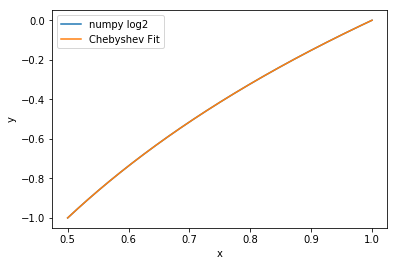

In [73]:
npoints=10000 #Number of points
order=150 #order of polynomial
ncoeff=8 #How many coefficients should we keep?

x = np.linspace(0.5, 1.0, npoints)

x_mapped = map_to_chevybounds(x) #Maps bounds to -1, 1

A, x_mapped = cheb_mat_uniform(npoints,order) #Gives us our chebyshev poly coefficients up to order

y = np.log2(x) #The actual data we want to fit, no noise

#Least-squares fit, mostly from class (see above mark down for explanation)
LHS=np.dot(A.transpose(),A) #Note, no noise
RHS=np.dot(A.transpose(),y) 
fit_parameters=np.dot(np.linalg.inv(LHS),RHS)


#A=A[:,1::2]

#print(fit_parameters)
#fit_parameters=fit_parameters[1::2]
#print(fit_parameters)

pred_cheb=np.dot(A[:,:ncoeff], fit_parameters[:ncoeff])

#print(fit_parameters[1::2])

#plt.title(r"log$_2$")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, label='numpy log2')
plt.plot(x, pred_cheb, label='Chebyshev Fit')
plt.legend()


('rms error for chebyshev is ', 1.9185635171270286e-07, ' with max error ', 3.196978251018834e-07)
('rms error for polyfit is ', 2.5552662532283804e-08, ' with max error ', 1.3080729743819575e-07)


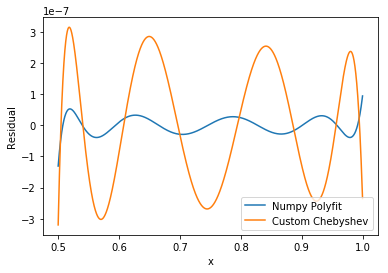

In [74]:
plt.xlabel("x")
plt.ylabel("Residual")

#plt.plot(x, y, label='numpy log2')
pred_poly = np.polyval(np.polyfit(x, y,ncoeff), x)
plt.plot(x, y-pred_poly, label='Numpy Polyfit')
plt.plot(x, y-pred_cheb, label='Custom Chebyshev')
plt.legend()

print('rms error for chebyshev is ',np.sqrt(np.mean((pred_cheb-y)**2.0)),' with max error ',np.max(np.abs(pred_cheb-y)))
print('rms error for polyfit is ',np.sqrt(np.mean((pred_poly-y)**2.0)),' with max error ',np.max(np.abs(pred_poly-y)))


## 1a)
Unfortunately, the Chebyshev we coded up didn't do as well as polyfit on this specific example. Both the RMS and max errors are better on polyfit. Although, our Chebyshev does perform better if we keep more coefficients, but the question asked for the minimum number of coefficients we should keep for an estimate with max error $< 10^{-6}$... The answer in this case is 8 coefficients (obtained by trial and error).

Alternatively, we could examine the fit coefficients and then truncate right after the coefficient of the n-th order polynomial drops below our tolerance. 


## 1b)
The way we've coded this (with mapping of bounds to -1, 1 for chebyshev), we can already do the fit on any positive interval.  

An example outside the 0.5, 1.0 bounds is found below. In this case, Chebyshev does perform better in both RMS and max error!

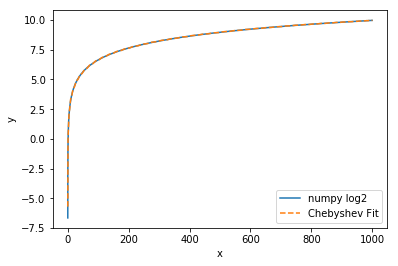

In [75]:
#Example outside of 0.5, 1 bounds... Different ncoeff


npoints=10000 #Number of points
order=150 #order of polynomial
ncoeff=90 #How many coefficients should we keep?

x = np.linspace(1e-2, 1000.0, npoints)

x_mapped = map_to_chevybounds(x) #Maps bounds to -1, 1

A, x_mapped= cheb_mat_uniform(npoints,order) #Gives us our chebyshev poly coefficients up to order

y=np.log2(x) #The actual data we want to fit, no noise

#Least-squares fit, mostly from class (see above mark down for explanation)
LHS=np.dot(A.transpose(),A) #Note, no noise
RHS=np.dot(A.transpose(),y) 
fit_parameters=np.dot(np.linalg.inv(LHS),RHS)


#A=A[:,1::2]

#print(fit_parameters)
#fit_parameters=fit_parameters[1::2]
#print(fit_parameters)

pred_cheb=np.dot(A[:,:ncoeff], fit_parameters[:ncoeff])

#print(fit_parameters[1::2])

#plt.title(r"log$_2$")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, label='numpy log2')
plt.plot(x, pred_cheb, label='Chebyshev Fit', ls='--')
plt.legend()



('rms error for chebyshev is ', 0.025773285721412048, ' with max error ', 0.9481085709000032)
('rms error for polyfit is ', 0.09821555293441667, ' with max error ', 6.677885282586321)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


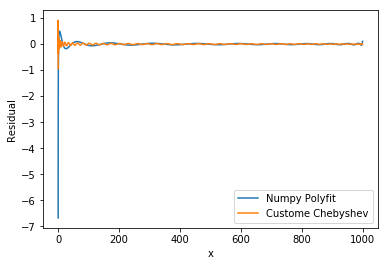

In [77]:
plt.xlabel("x")
plt.ylabel("Residual")

#plt.plot(x, y, label='numpy log2')
pred_poly = np.polyval(np.polyfit(x, y,ncoeff), x)
plt.plot(x, y-pred_poly, label='Numpy Polyfit')
plt.plot(x, y-pred_cheb, label='Custome Chebyshev')
plt.legend()

print('rms error for chebyshev is ',np.sqrt(np.mean((pred_cheb-y)**2.0)),' with max error ',np.max(np.abs(pred_cheb-y)))
print('rms error for polyfit is ',np.sqrt(np.mean((pred_poly-y)**2.0)),' with max error ',np.max(np.abs(pred_poly-y)))
